# Analiza Wielowymiarowa - zajecia 13 - Skalowanie wielowymiarowe

In [1]:
from multidim.utils import resolve_stata, load_stata

STATA_PATH, STATA_TYPE = resolve_stata(version = 17, stype = "se")
# make sure they are proper ones
STATA_PATH, STATA_TYPE

('/Applications/Stata', 'se')

In [2]:
load_stata(STATA_PATH, STATA_TYPE)


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring  1 Nov 2023
Serial number: 401709308728
  Licensed to: Maciej Nasinski
               University of Warsaw

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [3]:
import pandas as pd
import scipy
import sklearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from multidim.funs import plot_dendrogram

### Przykład 1.

Dane i przyklad zostaly pozyczone z podrecznika Stata MV

Zaladowanie danych z internetu. Jezeli nie dziala, zbior danych jest w materialach do zajec

Dane dotycza charakterystyk odzywczych platkow sniadanowych

In [5]:
%%stata 
use https://www.stata-press.com/data/r17/cerealnut
des 


. use https://www.stata-press.com/data/r17/cerealnut
(Cereal nutrition)

. des 

Contains data from https://www.stata-press.com/data/r17/cerealnut.dta
 Observations:            25                  Cereal nutrition
    Variables:             9                  24 Feb 2020 17:19
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
brand           str25   %25s                  Cereal Brand
calories        int     %9.0g                 Calories (Cal/oz)
protein         byte    %9.0g                 Protein (g)
fat             byte    %9.0g                 Fat (g)
Na              int     %9.0g                 Na (mg)
fiber           float   %9.0g                 Fiber (g)
carbs           float   %9.0g                 Carbs

Podstawowy opis statystyczny cech charakterystycznych płatkow sniadaniowych

In [6]:
%stata summarize calories-K, sep(4)


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
    calories |         25       109.6    21.30728         50        160
     protein |         25        2.68    1.314027          1          6
         fat |         25         .92    .7593857          0          2
          Na |         25       195.8    71.32204          0        320
-------------+---------------------------------------------------------
       fiber |         25         1.7    2.056494          0          9
       carbs |         25        15.3    4.028544          7         22
       sugar |         25         7.4    4.609772          0         14
           K |         25        90.6     77.5043         15        320


In [7]:
%stata replace brand = subinstr(brand," ","_",.)

(20 real changes made)


Polecenie mds wykonuje szkalowanie wielowymiarowe na podstawie podanych charakterystyk
opcja "id" jest niezbedna, identyfikuje obserwacje


Classical metric multidimensional scaling
Dissimilarity: L2, computed on 8 variables

                                             Number of obs        =         25
    Eigenvalues > 0      =         8         Mardia fit measure 1 =     0.9603
    Retained dimensions  =         2         Mardia fit measure 2 =     0.9970

    --------------------------------------------------------------------------
                 |                   abs(eigenvalue)          (eigenvalue)^2
      Dimension  |  Eigenvalue      Percent    Cumul.       Percent    Cumul.
    -------------+------------------------------------------------------------
              1  |   158437.92        56.95     56.95         67.78     67.78
              2  |   108728.77        39.08     96.03         31.92     99.70
    -------------+------------------------------------------------------------
              3  |   10562.645         3.80     99.83          0.30    100.00
              4  |   382.67849         0.14     9

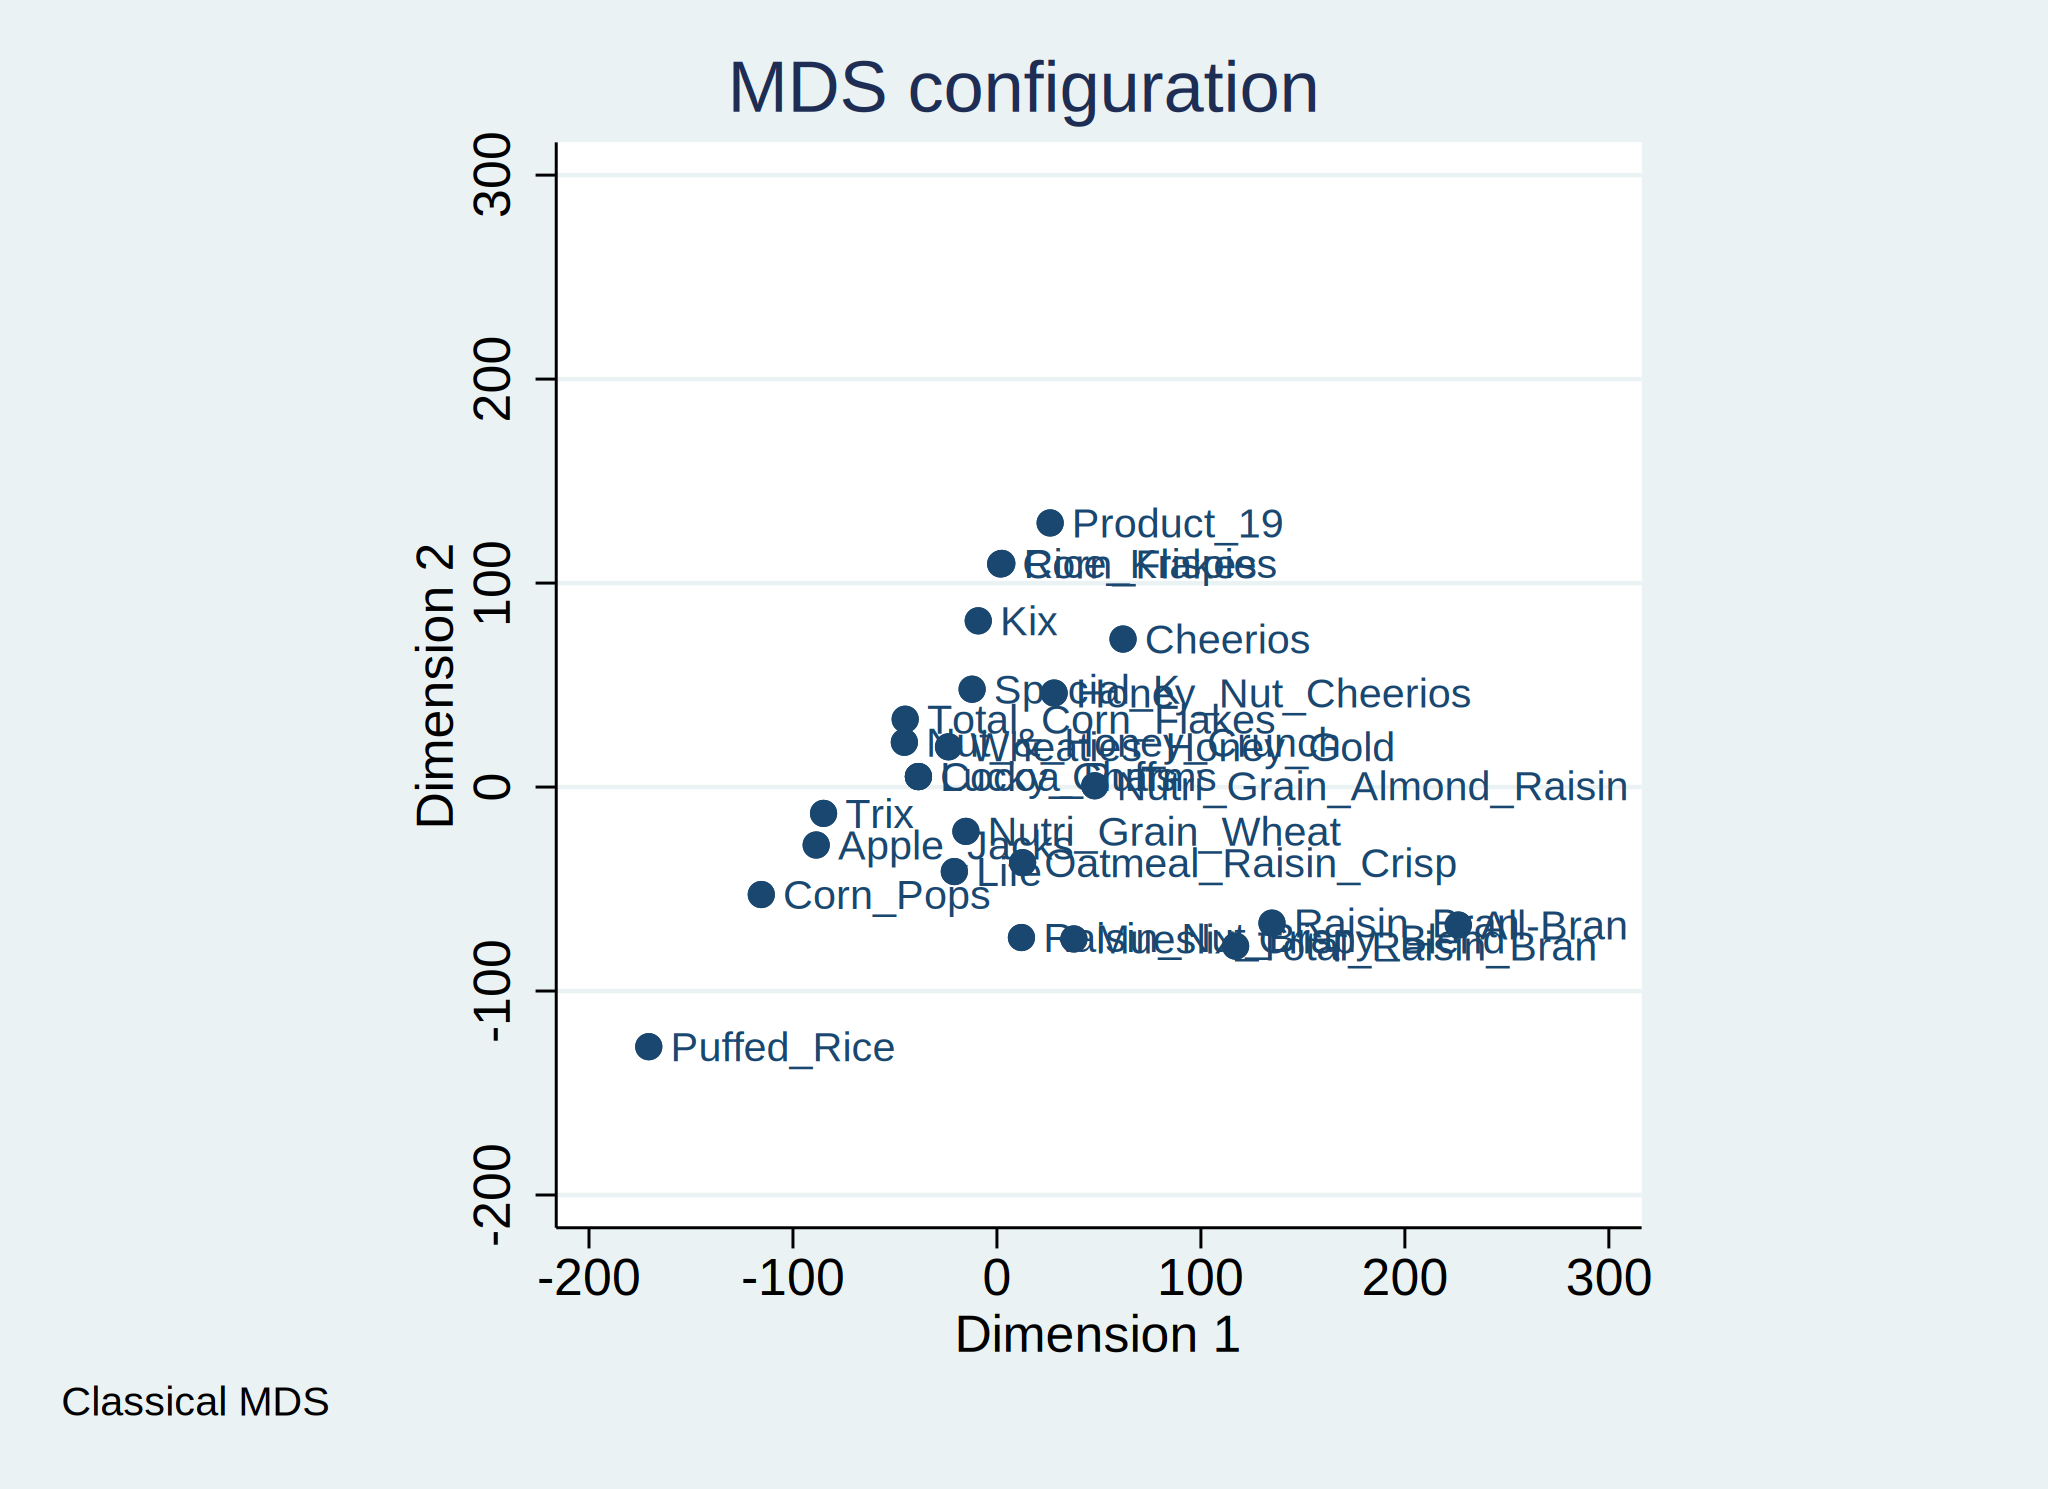

In [8]:
%stata mds calories-K, id(brand)

Dwie pierwsze wartosci wlasne wyjasniaja 99,7% niepodobienstwa  


Classical metric multidimensional scaling
Dissimilarity: L2, computed on 8 variables

                                             Number of obs        =         25
    Eigenvalues > 0      =         8         Mardia fit measure 1 =     0.5987
    Retained dimensions  =         2         Mardia fit measure 2 =     0.7697

    --------------------------------------------------------------------------
                 |                   abs(eigenvalue)          (eigenvalue)^2
      Dimension  |  Eigenvalue      Percent    Cumul.       Percent    Cumul.
    -------------+------------------------------------------------------------
              1  |   65.645395        34.19     34.19         49.21     49.21
              2  |   49.311416        25.68     59.87         27.77     76.97
    -------------+------------------------------------------------------------
              3  |   38.826608        20.22     80.10         17.21     94.19
              4  |   17.727805         9.23     8

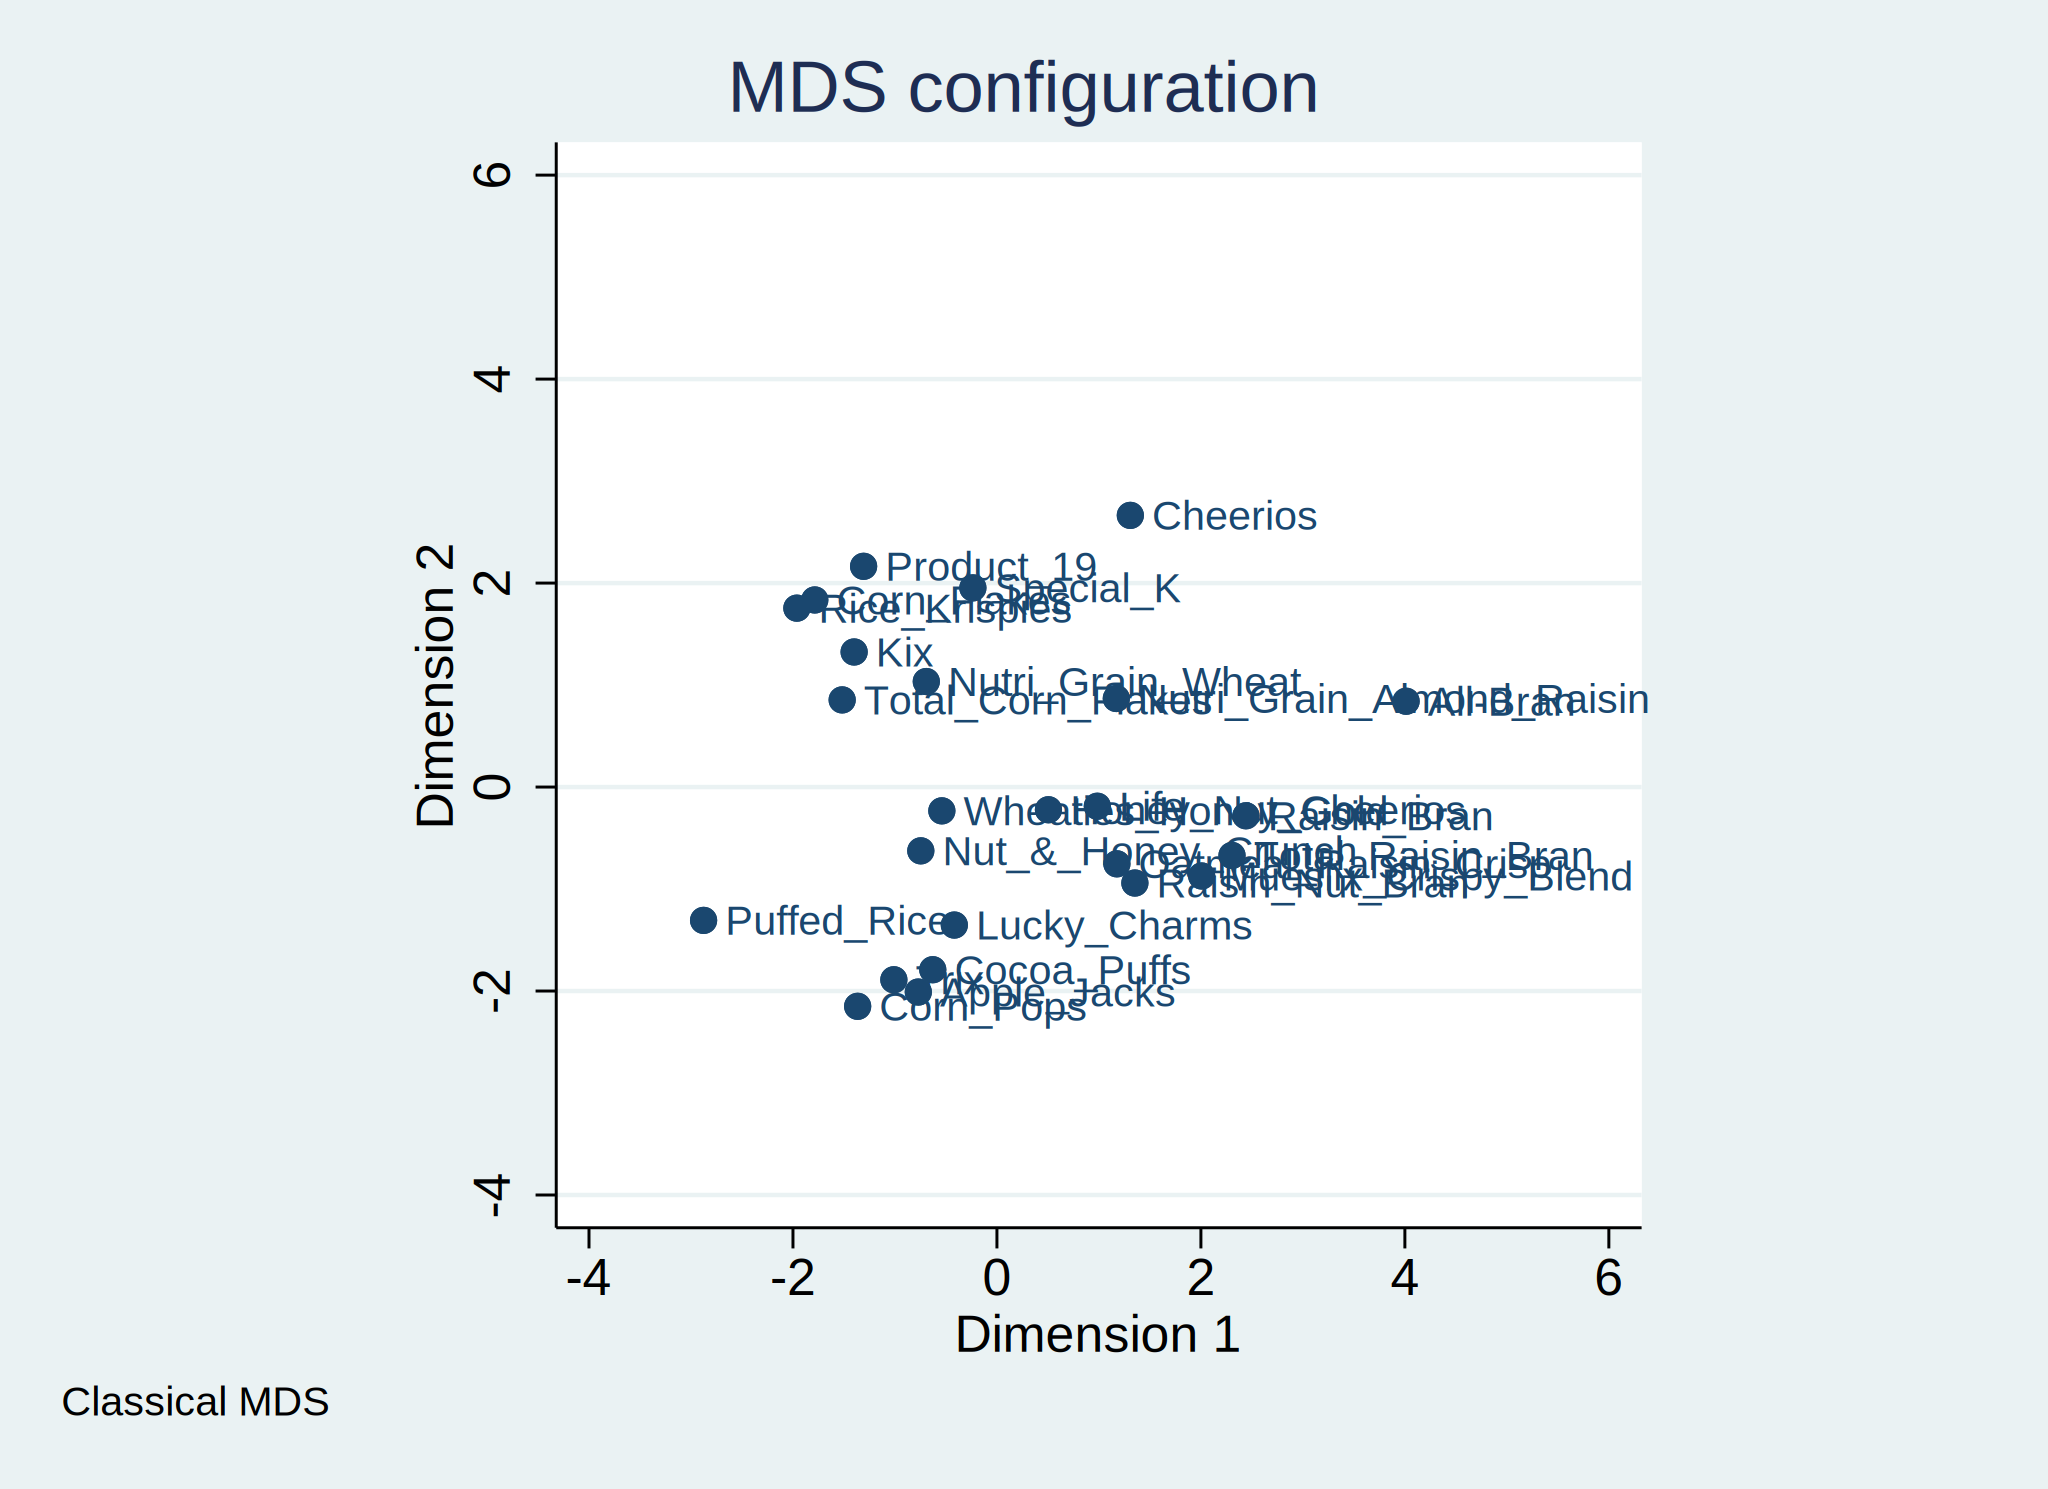

In [9]:
%stata mds calories-K, id(brand) std

opcja "std" przed wykonaniem obliczen standaryzuje wartosci charakterystyk